In [23]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
import numpy as np

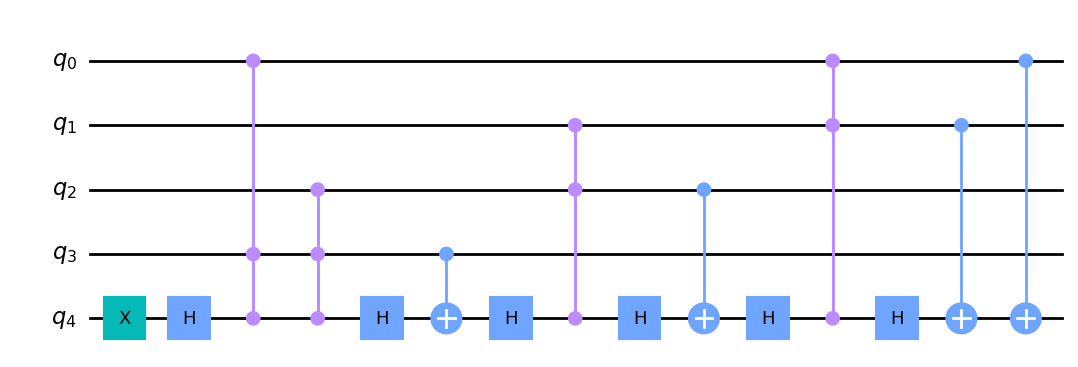

In [24]:
# Taken from https://github.com/Quantomatic/pyzx/blob/master/circuits/Fast/mod5_4_before
qc = QuantumCircuit(5)
qc.x(4)
qc.h(4)
qc.ccz(0, 3, 4)
qc.ccz(2, 3, 4)
qc.h(4)
qc.cx(3, 4)
qc.h(4)
qc.ccz(1, 2, 4)
qc.h(4)
qc.cx(2, 4)
qc.h(4)
qc.ccz(0, 1, 4)
qc.h(4)
qc.cx(1, 4)
qc.cx(0, 4)

qc.draw(output='mpl', style='clifford')

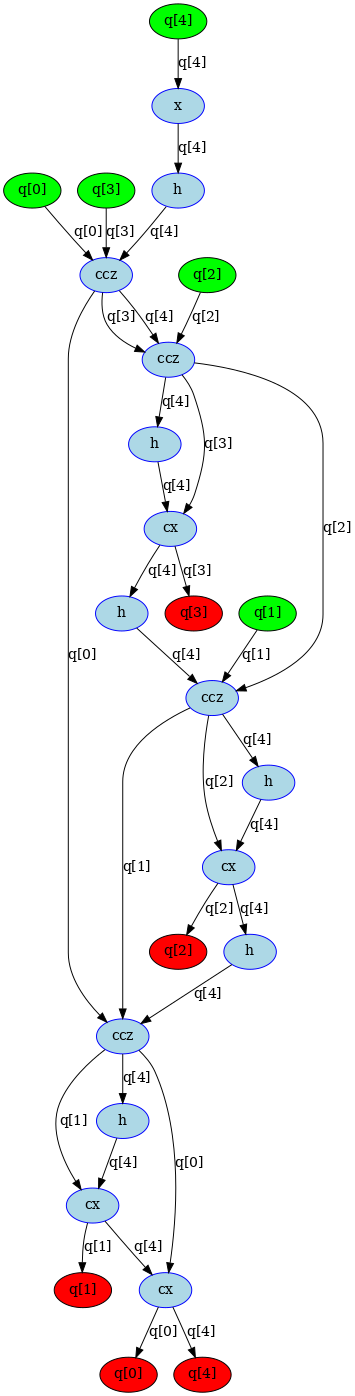

In [25]:
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [26]:
from qiskit.transpiler import PassManager
from zxpass import ZXPass

zxpass = ZXPass()
pass_manager = PassManager(zxpass)

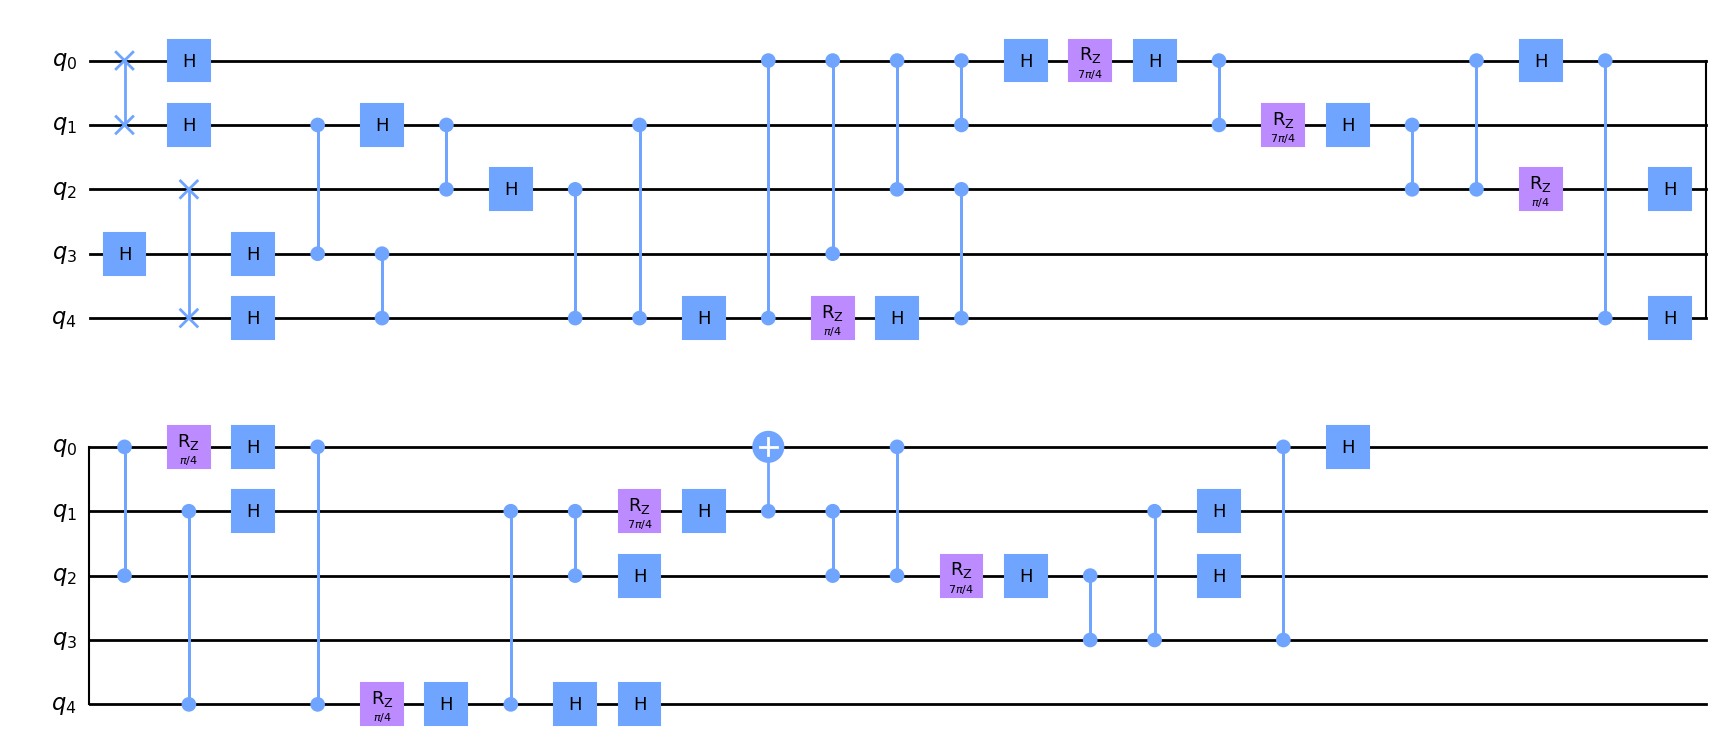

In [27]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')

In [28]:
from qiskit.quantum_info import Statevector
print(Statevector.from_instruction(qc).equiv(Statevector.from_instruction(zx_qc)))

True


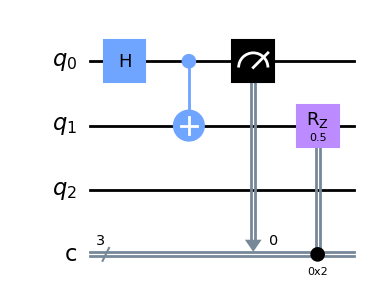

In [29]:
qc = QuantumCircuit(10)

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q[0], c[0])
qc.rz(0.5, q[1]).c_if(c, 2)

qc.draw(output='mpl', style='clifford')

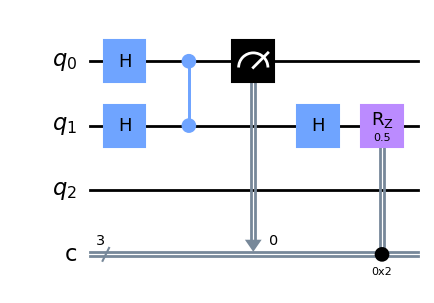

In [30]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')

In [ ]:
from qiskit import transpile
opt_qc = transpile(qc, basis_gates=['u3', 'cx'], optimization_level=3)
opt_qc.draw(output='mpl', style='clifford')

In [ ]:
from qiskit.quantum_info import Statevector
print("original circuit depth: ", qc.depth())
print("transpiled circuit depth: ", opt_qc.depth())
print("PyZX circuit depth: ", zx_qc.depth())
print(Statevector.from_instruction(qc).equiv(Statevector.from_instruction(zx_qc)))